# Jupyter 설정

In [2]:
%%javascript

(function(){function insertScript(source){var s=document.createElement('script');s.setAttribute('type','text/javascript');s.setAttribute('src',source);s.setAttribute('class','jupyter-sidenote-script');if(typeof s!='undefined'){document.getElementsByTagName('head')[0].appendChild(s)}}var src='https://jangxyz.github.io/jupyter-sidenote/dist/main.min.js';insertScript(src+'?'+Date.now());})()

<IPython.core.display.Javascript object>

# 딥러닝반 소개

이번 DS School 딥러닝반에서는 딥러닝 알고리즘의 원리를 하나하나 이해하면서 딥러닝이 구체적으로 어떻게 동작하는지를 배웁니다.

이 방식은 [DS School 입문과정](https://www.dsschool.co.kr/suggestions#headingOne)과 많이 다른데, 입문반에서는 이미 만들어진 알고리즘(Decision Tree, Random Forest, etc)을 잘 활용하고, 이 알고리즘에 좋은 Feature를 집어넣는 방법에 대해서 집중적으로 다뤘습니다.

하지만 딥러닝은 이런 방식을 사용할 수도, 사용하기에 적합하지도 않습니다. 먼저 딥러닝이라는 알고리즘의 최대 장점은 **"Feature를 스스로 찾아서 분석한다."**라는 것에 있습니다. 그렇기 때문에 딥러닝이 아닌 다른 알고리즘을 사용할 때 했던 Feature Engineering(새로운 Feature를 찾아내는 작업)이나 Feature Selection(Feature를 골라내는 작업)의 비중이 상대적으로 낮습니다. 반면 딥러닝은 다른 알고리즘에 비해 튜닝해야 하는 설정들이 매우 복잡하며, 이 설정들을 제대로 이해하지 못하면 **딥러닝 알고리즘이 제대로 동작하지 않습니다.** 제대로 동작하지 않는다는 것의 의미는 튜닝하기 전보다 성능이 낮아진다는게 아니라, 말 그대로 딥러닝 알고리즘이 제대로 동작하지 않는다는 의미입니다.

그렇기 때문에 딥러닝반에서는, 딥러닝 알고리즘의 원리를 하나하나 파악해가는 방식으로 수업을 진행할 것입니다.


이번 딥러닝반을 수강하는 데 필요한 사전 준비는 1) 약간의 파이썬 지식, 그리고 2) 약간의 수학입니다. 

* **파이썬**: 파이썬의 모든 기능을 다 알 필요는 없고, 함수와 클래스의 원리와 사용 방법 정도만 숙지하고 있으면 충분합니다. [점프 투 파이썬](https://wikidocs.net/book/1) 책을 읽으면 큰 도움이 될 겁니다.
* **수학**: 고등학교 수준의 미분을 다룰 수 있으면 충분하며, 편미분을 이해할 수 있다면 플러스입니다. 미분 문제를 잘 푸는 것이 아닌, 미분/편미분의 기본적인 원리는 이해하는 것 만으로 충분합니다. [수포자도 쉽게 알 수 있는 수학/미분과 적분](https://librewiki.net/wiki/%EC%8B%9C%EB%A6%AC%EC%A6%88:%EC%88%98%ED%8F%AC%EC%9E%90%EB%8F%84_%EC%89%BD%EA%B2%8C_%EC%95%8C_%EC%88%98_%EC%9E%88%EB%8A%94_%EC%88%98%ED%95%99/%EB%AF%B8%EB%B6%84%EA%B3%BC_%EC%A0%81%EB%B6%84) 을 읽고 이해할 수 있다면 수업을 따라오는데 큰 지장은 없습니다.


현재 딥러닝이 가장 많이 사용되고 있는 분야는 1) 이미지, 2) 자연어, 3) 음성인식입니다. 본 과정에서는 이 중 이미지, 그것도 이미지 분류(Image Classification)에 집중합니다. 이미지 분류를 이해할 수 있다면 나머지 분야는 어렵지 않기 때문에 독학으로도 충분히 따라올 수 있을 겁니다.

In [3]:
import numpy as np

<!-- jupyter-side-memo -->

numpy는 선형대수 라이브러리입니다. 빠른 수학 연산을 수행하는 역할을 합니다.

In [4]:
[1, 2, 3] + [4, 5, 6]

np.array([1, 2, 3]) + np.array([4, 5, 6])

array([5, 7, 9])

<!-- jupyter-side-memo -->

일반적으로 파이썬의 리스트 두 개를 서로 더하면 이어붙이기(concatenation)가 됩니다.

같은 크기의 `np.array` 두 개를  서로 더하면 각각 더한 합이 나타납니다.

In [5]:
[1, 2, 3] * 2

np.array([1, 2, 3]) * 2

array([2, 4, 6])

<!-- jupyter-side-memo -->

파이썬의 리스트에 숫자를 곱하면 하면 그 곱만큼 리스트 원소가 반복됩니다.

`np.array`에 숫자를 곱하면 각각의 원소에 그 값을 곱한 결과가 나타납니다.

In [6]:
# 시각화 라이브러리
import matplotlib.pyplot as plt

# jupyter 화면에 그래프를 그대로 보여주도록 설정하는 옵션
%matplotlib inline

<!-- jupyter-side-memo -->

시각화 라이브러리로 유명한 `matplotlib`을 사용합니다.

데이터를 가지고 그린 그래프를 jupyter 화면에 바로 보여주기 위해, `%matplotlib inline` 명령을 수행합니다.

## Generate Dataset

In [7]:
np.random.uniform()

0.3172644129064527

<!-- jupyter-side-memo -->

`np.random.uniform()` 함수는 0과 1 사이에서 임의의 값을 균등하게 가져옵니다. `0.001`을 가져올 확률과 `0.5`를 가져올 확률이 모두 동일하다는 뜻입니다.

(다른 함수 중에는 균등하게가 아니라 중앙값에 가까울 수록 더 자주 가져오도록 정규분포를 따르는 함수가 있습니다)

In [8]:
x = np.random.uniform(low=0.0, high=1.0, size=100)

print(x.shape)
x[0:10]

(100,)


array([ 0.56903808,  0.15934522,  0.56968215,  0.34992133,  0.43224278,
        0.87880562,  0.94300368,  0.20485124,  0.56498275,  0.25234819])

<!-- jupyter-side-memo -->

`size`를 지정하면 랜덤값을 한번에 여러개 가져올 수 있습니다. 0과 1 사이의 값을 100개 가져오고 있습니다.

`.shape`을 통해 `array`의 크기가 100이라는 것을 확인할 수 있습니다. <br>
데이터가 어떻게 생겼는지 앞의 10개만 살펴보고 있습니다.

In [9]:
# x의 모든 값에 0.3을 곱한다.
y = 0.3 * x

print(y.shape)
print('x =', x[0:6])
print('y =', y[0:6])

(100,)
x = [ 0.56903808  0.15934522  0.56968215  0.34992133  0.43224278  0.87880562]
y = [ 0.17071142  0.04780357  0.17090464  0.1049764   0.12967283  0.26364169]


<!-- jupyter-side-memo -->

`np.array`에 숫자를 곱하면 각각의 원소에 숫자만큼 곱해지게 됩니다. 즉 `y` 배열(array)은 크기가 100인 `x` 배열의 모든 원소에 0.3을 곱한 원소들이 됩니다.

x와 y의 값을 시각화 해보도록 하겠습니다.

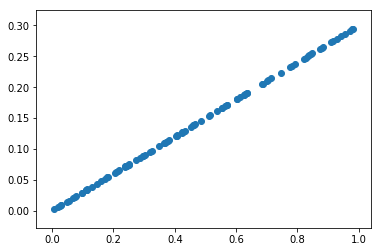

In [10]:
# scatter plot
plt.scatter(x, y)

<!-- jupyter-side-memo -->

`matplotlib`의 `scatter` 함수를 이용해서 x와 y를 2차원상에 점으로 시각화 해보았습니다.

모두 일관되게 한 직선 위에 나타나는 것을 볼 수 있습니다.

## 학습 목표 - 데이터만으로 기울기를 찾아내자

** 목표 **

이 x, y 데이터를 이용해서 학습을 하도록 하겠습니다.

우리의 알고리즘은 x와 y의 관계를 모른채, 주어진 데이터만 보고 그 기울기를 학습해서 찾아낼 것입니다.

### Case 1 - Random Search

첫 시도로는 무작위로 x와 y의 관계를 추측하는 방식을 사용해 보도록 하겠습니다.

**전략**: $x$에 랜덤한 값을 곱해 $y_{predict}$를 만든다. 이 추정값 $y_{predict}$가 실제값 $y$와 차이가 적으면 적을수록 바람직하다.

In [11]:
num_epoch = 100

for epoch in range(num_epoch):
    w = np.random.uniform(low=0.0, high=1.0)
    y_predict = w * x
    
    error = np.abs(y_predict - y).mean()
    print(w, error)

0.4594422967439107 0.0722792054296
0.4052803998029687 0.047726254579
0.5182282212011502 0.0989283443154
0.7328035852860489 0.196200756577
0.6588548816627253 0.162677948329
0.44689261122513846 0.066590117175
0.049787430824688284 0.113427654128
0.20693893014463327 0.0421869248182
0.7102488753423684 0.185976138977
0.3524093833534082 0.0237584923398
0.3943965809899034 0.0427923456232
0.23850492659127043 0.0278772642805
0.7091047499064507 0.185457478126
0.5877428939589111 0.130441094792
0.14194280079487598 0.0716513058597
0.22512167491426904 0.033944229051
0.4870920136115232 0.0848135178821
0.6249896012764282 0.14732596452
0.14926783625676565 0.0683306829526
0.8492363973321782 0.248982680273
0.9899273515137473 0.312761430247
0.3253178896198541 0.0114772364815
0.2578315575983736 0.0191160160963
0.3618709775411234 0.0280476710832
0.5410398471911569 0.109269428424
0.25605066945682364 0.0199233375064
0.10868388456096156 0.0867284095387
0.5531033995960241 0.114738140305
0.15012770043371304 0.067

<!-- jupyter-side-memo -->

100번의 회차(epoch)동안,
크기가 100인 배열 `x`에 랜덤한 값 100개가 들어 있는 `w`를 곱합니다.
`y_predict`에는 이 곱의 결과가 저장되어 있습니다. 역시 크기가 100인 배열입니다.
```python
y_predict = w * x
```

`y_predict`와 `y`의 차이를 계산하면, 100개의 차이값을 구할 수 있습니다.
```python
y_predict - y
```

우리가 관심 있는 것은 '얼만큼 큰 차이가 나고 있는지'이지, `y_predict`의 원소가 더 컸는지 `y`의 원소가 더 컸는지가 아닙니다. 각각의 차이가 음수인지 양수인지는 관심이 없기 때문에, 절대값을 구하는 `np.abs` 함수를 이용해서 모든 차이를 양수로 변환합니다.
```python
np.abs(y_predict - y)
```

100개나 되는 원소들의 차이를 일일히 들고 있으려면 복잡하기 때문에, 이들의 평균값을 대표로 들고 있겠습니다.
```python
error = np.abs(y_predict - y).mean()
```

결국 매 회차마다 우리가 계산한 것은 "임의의 값을 데이터 `x`에 곱했을 때 실제 값 `y`와의 차의 절대값의 평균"이 되는 것입니다.

이제 위 코드를 이용해서, 매 회차마다 '이전보다 더 결과가 잘 나온 값'만을 보관하도록 하겠습니다.

100번쯤 돌고 나면 아마 충분히 좋은 결과만 남아 있겠죠?

In [18]:
# best_error 값을 들고 있으면서, 새로 계산한 error와 계속해서 비교한다.
# 루프가 끝날 때 저장되어 있는 값이 가장 적당한 값이다.

num_epoch = 100
best_error = 9999 # ※ (1)

for epoch in range(num_epoch):
    w = np.random.uniform(low=0.0, high=1.0)
    y_predict = w * x
    
    error = np.abs(y_predict - y).mean()
    
    # 이제까지 나온 최고 값과 비교한다.
    if error < best_error:  # ※ (2)
        best_w = w
        best_error = error
        
        print(f"{epoch:2} w = {best_w:.6}, error = {best_error:.6f}")
    
# ※ (3)
print("----" * 10)
print(f"{epoch:2} w = {best_w:2}, error = {best_error:.6f}")

 0 w = 0.651733, error = 0.159449
 1 w = 0.444996, error = 0.065730
 4 w = 0.279542, error = 0.009274
72 w = 0.291448, error = 0.003877
77 w = 0.298021, error = 0.000897
96 w = 0.299953, error = 0.000021
----------------------------------------
99 w = 0.2999531451417199, error = 0.000021


<!-- jupyter-side-memo -->
먼저번의 코드와 비교해서 2군데 수정사항이 생겼습니다.

**※ (1)**

먼저 `best_error`라는 변수를 새로 만들고, 앞으로 가장 작은 에러만 저장하고 있도록 하겠습니다. 물론 처음의 값은 아주 큰 값이어야 합니다.

**※ (2)**

매 회차마다 계산한 `error`를 `best_error`와 비교합니다. 만약에 새로 계산한 `error`가 기존의 최고결과보다도 더 오차가 적다고 나오면, 최고 기록을 경신할 필요가 있습니다. `best_error` 만 수정할 뿐이 아니라 최고값을 만든 `w`도 저장해 둡니다.

**※ (3)**

주어진 모든 회차를 모두 돌고 나면, 최고기록을 내게 한 `w`와 그때의 `error`를 알 수 있게 됩니다.

조금 더 개선해 보도록 하겠습니다.

In [17]:
# 적당한 타이밍에 스탑한다.

num_epoch = 100

best_error = 9999

for epoch in range(num_epoch):
    w = np.random.uniform(low=0.0, high=1.0)
    y_predict = w * x
    
    error = np.abs(y_predict - y).mean()
    
    if error < 0.003: # ※ (1)
        break
    
    # 이제까지 나온 최고 값과 비교한다.
    if error < best_error:
        best_w = w
        best_error = error
        
        print(f"{epoch:2} w = {best_w:.6f}, error = {best_error:.6f}")
    
print("----" * 10)
print(f"{epoch:2} w = {best_w:.6f}, error = {best_error:.6f}")

 0 w = 0.492455, error = 0.087245
 1 w = 0.247129, error = 0.023968
 6 w = 0.270048, error = 0.013578
 7 w = 0.276200, error = 0.010789
26 w = 0.309792, error = 0.004439
----------------------------------------
99 w = 0.309792, error = 0.004439


<!-- jupyter-side-memo -->

**※ (1)**

우리가 판단하기에 `error`가 이제 충분히 작아졌다고 생각이 든다면, 굳이 남은 회차를 모두 돌 필요 없이 중간에 루프를 빠져나오도록 합니다.

이 경우에는 에러가 `0.003`보다 작으면 충분하다고 판단했습니다.

```python
for epoch in range(num_epoch):
    ...
    if error < 0.003:
        break
    ...
```

이상이 무작위 검색(random search)을 이용해서 y의 값을 추정하는 방식입니다.
구현 방식이 단순하(고 무식하)다는 데에 그 특징이 있습니다.

그렇다면 이 방법의 **문제점**은 무엇일까요?

문제점 중 하나로, 만약에 `y`에 붙은 상수가 `0.3`이 아니라 더 큰 값 -- 예컨대, 100 -- 이라면,
단순히 0과 1 사이의 랜덤한 값으로는 찾을 수 없다는 데에 있습니다.

`w`를 구하는 데에 더 큰 랜덤 값을 써야 합니다. 그러면 그만큼 정확도 떨어지게 되고, 답을 구하는 데 더 오래 걸리거나 부정확한 결과가 나올 수 있습니다.

다음에는 무작위 방식보다 조금 더 똑똑한 방식을 써보도록 하겠습니다.

### Case 2 - h-step search

다음 방법으로, "h-step search" 방식이라는 것을 써보도록 하겠습니다.
h-step search는 매번 랜덤하게 `w`를 다시 구하는 것이 아니라, 가급적 이전에 구한 `w` 중 괜찮은 값을 보존하려고 노력합니다.

**h-step search 전략: 에러가 적게 난 방향을 찾아서 한 발자국씩 이동한다.**

1. 어느 '방향'이 에러가 적은지 판단한다.
2. 한번에 그 방향으로 한 발자국씩 `h` 만큼 이동한다.

※ **NOTE** h-step은 나중에 나올 Gradient search 방법으로 가는 사이에 임시로 만난 방식입니다. (실제 존재하진 않아요~)

In [19]:
num_epoch = 100
h = 0.1 # ※ (1)

w = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = w * x
    current_error = np.abs(y_predict - y).mean()
    
    print(epoch, w, current_error)

0 0.6151403405242338 0.142861046768
1 0.6151403405242338 0.142861046768
2 0.6151403405242338 0.142861046768
3 0.6151403405242338 0.142861046768
4 0.6151403405242338 0.142861046768
5 0.6151403405242338 0.142861046768
6 0.6151403405242338 0.142861046768
7 0.6151403405242338 0.142861046768
8 0.6151403405242338 0.142861046768
9 0.6151403405242338 0.142861046768
10 0.6151403405242338 0.142861046768
11 0.6151403405242338 0.142861046768
12 0.6151403405242338 0.142861046768
13 0.6151403405242338 0.142861046768
14 0.6151403405242338 0.142861046768
15 0.6151403405242338 0.142861046768
16 0.6151403405242338 0.142861046768
17 0.6151403405242338 0.142861046768
18 0.6151403405242338 0.142861046768
19 0.6151403405242338 0.142861046768
20 0.6151403405242338 0.142861046768
21 0.6151403405242338 0.142861046768
22 0.6151403405242338 0.142861046768
23 0.6151403405242338 0.142861046768
24 0.6151403405242338 0.142861046768
25 0.6151403405242338 0.142861046768
26 0.6151403405242338 0.142861046768
27 0.615140

<!-- jupyter-side-memo -->

아직까지는 이전 random search와 크게 달라지지 않았습니다.

차이가 있다면 먼저 한발자국으로 얼마만큼 이동할지 `h`의 값을 우리가 정해주었다는 것입니다.

In [20]:
num_epoch = 100
h = 0.1 # ※

w = np.random.uniform(low=0.0, high=1.0)
# w = 0.0

for epoch in range(num_epoch):
    y_predict = w * x
    current_error = np.abs(y_predict - y).mean()
    
    # 미래로 한발자국 더 가서 비교해본다. ※ (1)
    y_predict = (w + h) * x # y를 한번 더 계산해 본다.
    h_plus_error = np.abs(y_predict - y).mean()
    
    if h_plus_error < current_error:
        w = w + h    
#         print(f"{epoch:2} w = {w:.6f}, error={current_error}, {h_plus_error}")
    
print(f"{epoch:2} w = {w:.6f}, error={current_error}")

99 w = 0.313438, error=0.006091558273330273


<!-- jupyter-side-memo -->



In [21]:
num_epoch = 100
h = 0.01

w = np.random.uniform(low=0.0, high=1.0)
# w = 0

for epoch in range(num_epoch):
    y_predict = w * x
    current_error = np.abs(y_predict - y).mean()
    
    if current_error < 0.001: # ※
        break

    # +h만큼 이동해본다
    y_predict = (w + h) * x
    h_plus_error = np.abs(y_predict - y).mean()
    if h_plus_error < current_error:
        w = w + h
        continue
        
    # 반대 방향으로 가본다
    y_predict = (w - h) * x
    h_minus_error = np.abs(y_predict - y).mean()
    if h_minus_error < current_error:
        w = w - h
        continue
        
    # 어느 쪽으로 가도 결과가 좋아지지 않는다면, 이미 최적의 위치에 도달했다는 얘기겠네요.
    # 이만 루프를 끝냅니다.
    break
       
print(f"{epoch:2} w = {w:.6f}, error = {current_error:6f}")

49 w = 0.296263, error = 0.001694


<!-- jupyter-side-memo -->

h-step 방식에서는 매 회차마다 `w`를 새로 계산하지 않고, 이전에 계산했던 `w`를 조금씩 수정해 가면서 사용합니다.

얼마만큼씩 수정하면 좋을까요? 에러가 컸을 때는 크게, 에러가 작을 때는 작게 수정하는 것이 좋을 것입니다.

하지만 에러값은 이미 원소들 각각의 오차가 아닌, 그것들의 평균값으로 치환되어 버렸습니다. 각각의 `w` 원소들에게 일괄적으로 그 평균 에러를 빼버리면 어떻게 될까요?

원소에 따라서는 실제 `y` 원소에 가깝게 다가가는 원소도 있겠지만, 어떤 원소는 너무 조금 다가가기도 할 것입니다. 더 나쁜 경우는 실제 `y` 값을 지나쳐서 가버릴 수도 있습니다. 그 원소에게는 에러가 너무 컸던 것입니다.

따라서 우리가 정한 한발자국 `h` 만큼 이동해 봅니다. 양수만큼 이동하는 것이 좋을지, 음수만큼 이동하는 것이 좋을지 모르니 양쪽 방향으로 다 해봅니다.
현재의 에러보다 작아지면 값이 나오면, 성공입니다.

실행해보면 100번을 모두 돌기 전에 충분히 에러가 작아져서 루프를 끝내고 나오는 것을 확인할 수 있습니다. `w`의 초기값이 임의로 정해지기 때문에 실행할 때마다 회차수는 달라지지만, 대부분 99에 미치지 못하고 그 전에 끝나고 있습니다.

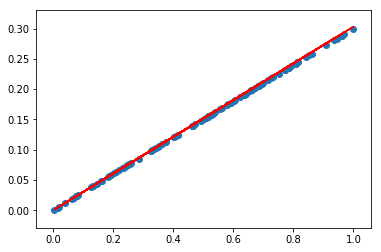

In [8]:
y_predict = w * x

plt.scatter(x, y)
plt.plot(x, y_predict, c='r')

<!-- jupyter-side-memo -->
`w`를 제대로 구했는지, 실제 `x`, `y` 데이터 위로 우리의 추정선을 그어 보도록 하겠습니다.



h-step search는 매 회차마다 `w`를 완전히 새로 계산하는 것이 아니라, 이전에 계산했던 값을 기반으로 필요한만큼만 업데이트하기 때문에 시간을 절약한다는 장점이 있습니다.

하지만 이 방법으로는 `h`를 얼마로 정해야 할지 모른다는 단점이 있습니다. `h`를 너무 작게 정할 경우, 너무 오래 걸릴 수도 있습니다.


### Case 3 - Gradient Descent (not yet)

이번에는 error의 크기를 보고 그에 맞추어서 `h`의 값을 유기적으로 바꾸어보도록 하겠습니다. 이 방법이 성공한다면 `h`의 값을 얼마로 정하는 것이 바람직할지 고민을 하지 않아도 됩니다.

In [22]:
# error의 크기를 이용해서 h를 변화시키는 정도를 결정한다.

num_epoch = 100

w = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = w * x
    
    error = np.abs(y_predict - y).mean()
    if error < 0.001:
        break

    # w 값을 바로 수정합니다.
    w = w - (y_predict - y).mean() # ※ (1)

    print(f"{epoch:2} w = {w:.6f}, error = {error:6f}")

print("----" * 10)
print(f"{epoch:2} w = {w:.6f}, error = {error:6f}")

 0 w = 0.321944, error = 0.018196
 1 w = 0.311996, error = 0.009948
 2 w = 0.306558, error = 0.005438
 3 w = 0.303585, error = 0.002973
 4 w = 0.301960, error = 0.001625
----------------------------------------
 5 w = 0.301960, error = 0.000888


<!-- jupyter-side-memo -->

**※ (1)**

각 원소들의 에러 `y_predict - y`의 평균을 구하고 그것을 `w`에서 빼주고 있습니다.

위의 h-step 방식과 달리, 양의 방향과 음의 방향을 따로 계산하고 있지 않습니다. `y_predict`가 대부분 `y`보다 크다면 에러의 평균은 양수값이 되고, 그러면 `w`를 줄이면 됩니다.
반대로 대부분의 `y_predict`보다 `y`가 크다면 에러의 평균은 음수값이 되고, `w`에서 음수를 빼면 결과적으로 `w` 값이 더 커지게 됩니다.

결과가 아주 빨리 수렴하고 있습니다. 10번이 채 걸리지 않고 있습니다.

※ **NOTE**

절대값이 씌워진 `np.abs(y_predict - y).mean()`과 <br> 절대값이 없는 `(y_predict - y).mean()`의 차이에 주의하세요.

- `np.abs(y_predict - y).mean()`: 에러의 양의 크기의 평균. 에러에서 방향에 대한 정보는 지우고, 얼마나 참값에서 벗어나 있는지 그 크기만을 나타낸다.
- `(y_predict - y).mean()`: 에러들의 평균. 방향까지 감안해서 에러들이 평균적으로 벗어난 정도를 가늠한다. 각 원소들의 에러끼리 상쇄되는 효과까지 포함한다.


---

# 데이터 변수가 여러개인 경우

`y`를 나타내는 변수가 하나보다 많으면 어떻게 될까요?

`y`를 `x1`과 `x2` 두 개의 변수로 표현하는 경우에 대해 살펴보겠습니다.

## Generate Dataset (2 var)

In [24]:
x1 = np.random.uniform(low=0.0, high=1.0, size=100)

##
print(x1.shape)
x1[0:4]

(100,)


array([ 0.05094007,  0.19210054,  0.82724913,  0.73087288])

<!-- jupyter-side-memo -->
랜덤한 값 100개를 만들어 **변수 `x1`**에 저장합니다.

In [25]:
x2 = np.random.uniform(low=0.0, high=1.0, size=100)

##
print(x2.shape)
x2[0:4]

(100,)


array([ 0.75048761,  0.03009296,  0.32424234,  0.64926923])

<!-- jupyter-side-memo -->
마찬가지로 **변수 `x2`**에 랜덤한 값 100개를 저장합니다.

In [26]:
y = 0.3 * x1 + 0.5 * x2

##
print(y.shape)
print('x1 =', x1[0:4])
print('x2 =', x2[0:4])
print('y  =', y[0:4])

(100,)
x1 = [ 0.05094007  0.19210054  0.82724913  0.73087288]
x2 = [ 0.75048761  0.03009296  0.32424234  0.64926923]
y  = [ 0.39052583  0.07267664  0.41029591  0.54389648]


<!-- jupyter-side-memo -->
`y`는 이 `x1`과 `x2`의 조합으로 나타납니다.

```python
y = 0.3 * x1 + 0.5 * x2
```

### Case 1 - Random Search

그러면 랜덤 서치부터 하나씩 해보도록 하겠습니다.

In [27]:
# 적당한 타이밍에 스탑한다.

num_epoch = 5000

best_error = 9999

for epoch in range(num_epoch):
    w1 = np.random.uniform(low=0.0, high=1.0) # ※ 1
    w2 = np.random.uniform(low=0.0, high=1.0)
    y_predict = w1 * x1 + w2 * x2
    
    error = np.abs(y_predict - y).mean()
    if error < 0.003:
        break
    
    # 이제까지 나온 최고 값과 비교한다.
    if error < best_error:
        best_w1 = w1 # ※ 2
        best_w2 = w2
        best_error = error
        
        print(f"{epoch:2} w1 = {best_w1:.6}, w2 = {best_w2:.6}, error = {best_error:.6f}") # ※ 3
    
print("----")
print(f"{epoch:2} w1 = {best_w1:.6}, w2 = {best_w2:.6}, error = {best_error:.6f}")

 0 w1 = 0.124609, w2 = 0.349701, error = 0.166696
 2 w1 = 0.674719, w2 = 0.459286, error = 0.165143
 3 w1 = 0.455682, w2 = 0.39116, error = 0.046870
18 w1 = 0.151689, w2 = 0.620315, error = 0.044938
37 w1 = 0.390097, w2 = 0.384504, error = 0.035893
74 w1 = 0.350249, w2 = 0.450877, error = 0.016104
294 w1 = 0.305709, w2 = 0.520694, error = 0.013863
327 w1 = 0.270128, w2 = 0.529393, error = 0.009611
1238 w1 = 0.287801, w2 = 0.524313, error = 0.008296
1402 w1 = 0.32613, w2 = 0.481388, error = 0.007867
3315 w1 = 0.292974, w2 = 0.498983, error = 0.004006
4072 w1 = 0.290798, w2 = 0.502823, error = 0.003355
----
4999 w1 = 0.290798, w2 = 0.502823, error = 0.003355


<!-- jupyter-side-memo -->
처음의 코드와 비교해서 변한 곳은:

- **※ 1** - `w1`, `w2` 둘 다 계산합니다.
- **※ 2** - 최고값과 비교해서 `btest_error`, `best_w1`, `best_w2`을 할당합니다.
- **※ 3** - 출력

그런데, 처음과 동일한 방식으로 접근했는데 계산 결과가 만족스럽지 않습니다. 에러가 `0.003` 밑으로는 어지간해서는 내려가지 않습니다. 심지어 회차 수를 5000번까지 늘려도 마찬가지입니다.

그 이유는, 하나의 변수만 관계를 가지고 있을 때에 비해서 두 개의 변수가 생기자 너무 복잡해져서 단순히 랜덤한 값으로 맞추기가 어려워졌기 때문입니다.

변수가 많아지면 실제에서는 랜덤 서치를 사용하기가 어렵습니다.

### Case 2 - h-step search

임시 단계인 h-step search는 건너띄고 바로 gradient search를 향해 가도록 하겠습니다

### Case 3 - Gradient Descent (still not yet)

In [28]:
# error의 크기를 이용해서 h를 변화시키는 정도를 결정한다.

num_epoch = 100

w1 = np.random.uniform(low=0.0, high=1.0) # ※ (1)
w2 = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = w1 * x1 + w2 * x2 # ※
    
    error = np.abs(y_predict - y).mean()
    if error < 0.001:
        break

    w1 = w1 - (y_predict - y).mean() # ※ (2)
    w2 = w2 - (y_predict - y).mean()

    print(f"{epoch:2} w1 = {w1:.6f}, w2 = {w2:.6f} error = {error:6f}") # ※

print("----" * 10)
print(f"{epoch:2} w1 = {w1:.6f}, w2 = {w2:.6f} error = {error:6f}")

 0 w1 = 0.118271, w2 = 0.667593 error = 0.056511
 1 w1 = 0.118353, w2 = 0.667675 error = 0.056555
 2 w1 = 0.118350, w2 = 0.667673 error = 0.056552
 3 w1 = 0.118350, w2 = 0.667673 error = 0.056553
 4 w1 = 0.118350, w2 = 0.667673 error = 0.056553
 5 w1 = 0.118350, w2 = 0.667673 error = 0.056553
 6 w1 = 0.118350, w2 = 0.667673 error = 0.056553
 7 w1 = 0.118350, w2 = 0.667673 error = 0.056553
 8 w1 = 0.118350, w2 = 0.667673 error = 0.056553
 9 w1 = 0.118350, w2 = 0.667673 error = 0.056553
10 w1 = 0.118350, w2 = 0.667673 error = 0.056553
11 w1 = 0.118350, w2 = 0.667673 error = 0.056553
12 w1 = 0.118350, w2 = 0.667673 error = 0.056553
13 w1 = 0.118350, w2 = 0.667673 error = 0.056553
14 w1 = 0.118350, w2 = 0.667673 error = 0.056553
15 w1 = 0.118350, w2 = 0.667673 error = 0.056553
16 w1 = 0.118350, w2 = 0.667673 error = 0.056553
17 w1 = 0.118350, w2 = 0.667673 error = 0.056553
18 w1 = 0.118350, w2 = 0.667673 error = 0.056553
19 w1 = 0.118350, w2 = 0.667673 error = 0.056553
20 w1 = 0.118350, w2

<!-- jupyter-side-memo -->

이 코드도 마찬가지로 `w1`, `w2`를 할당하는 부분(**※ 1**)과 갱신하는 부분(**※ 2**)이 수정되었습니다.

그런데 결과가 이상합니다.

어느 순간부터 더 이상 에러가 작아지지 않고 있습니다. 결국 100번의 회차가 모두 돌 때까지, 에러는 처음에만 조금 작아질 뿐 더 이상 개선되지 않았습니다. <br>
그 이유는 무엇일까요?

그 이유는 `w1`과 `w2` 두 개의 변수가 각기 다른 방향으로 차이가 나고 있기 때문입니다.

이를테면 `w1`은 양의 방향으로 작아져야 하고, `w2`는 음의 방향으로 작아져야 하는 상황인데, 둘 다 모두 같이 `(y_predict - y).mean()` 작아지도록 하고 있기 때문에, 어느 한쪽은 좋아지지만 반대쪽이 나빠지는 것입니다.

... 직교 좌표 내에 `(0.3, 0.5)` 위치에 도달해야 하는데,
w1과 w2가 차이 나는 부분을 각기 적용해야 하는데
둘이 동일하게 적용되니까 어느 순간 다른 한쪽은 지나쳐 버립니다.

그럼 `w1`, `w2`에 알맞게 값을 다르게 적용하려면 어떻게 하면 될까요?


In [29]:
num_epoch = 100

w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = w1 * x1 + w2 * x2
    
    error = np.abs(y_predict - y).mean()
    
    if error < 0.001:
        break

    w1 = w1 - ((y_predict - y) * x1).mean() # ※ 1
    w2 = w2 - ((y_predict - y) * x2).mean()

    print(f"{epoch:2} w1 = {w1:.6f}, w2 = {w2:.6f} error = {error:6f}") # ※

print("----" * 10)
print(f"{epoch:2} w1 = {w1:.6f}, w2 = {w2:.6f} error = {error:6f}")

 0 w1 = 0.259684, w2 = 0.298450 error = 0.314986
 1 w1 = 0.324871, w2 = 0.379973 error = 0.127488
 2 w1 = 0.347974, w2 = 0.415856 error = 0.053026
 3 w1 = 0.354350, w2 = 0.433099 error = 0.027645
 4 w1 = 0.354209, w2 = 0.442609 error = 0.020769
 5 w1 = 0.351649, w2 = 0.448802 error = 0.018324
 6 w1 = 0.348307, w2 = 0.453474 error = 0.016694
 7 w1 = 0.344829, w2 = 0.457365 error = 0.015347
 8 w1 = 0.341462, w2 = 0.460784 error = 0.014148
 9 w1 = 0.338291, w2 = 0.463871 error = 0.013050
10 w1 = 0.335340, w2 = 0.466690 error = 0.012038
11 w1 = 0.332607, w2 = 0.469280 error = 0.011105
12 w1 = 0.330082, w2 = 0.471664 error = 0.010244
13 w1 = 0.327751, w2 = 0.473862 error = 0.009450
14 w1 = 0.325601, w2 = 0.475889 error = 0.008717
15 w1 = 0.323616, w2 = 0.477758 error = 0.008041
16 w1 = 0.321785, w2 = 0.479483 error = 0.007418
17 w1 = 0.320096, w2 = 0.481073 error = 0.006843
18 w1 = 0.318539, w2 = 0.482541 error = 0.006312
19 w1 = 0.317101, w2 = 0.483894 error = 0.005823
20 w1 = 0.315776, w2

<!-- jupyter-side-memo -->

위의 코드와 비교하면 한 군데만 바뀌었습니다.

**※ 1**

`w1 = w1 - ((y_predict - y) `**` * x1`**`).mean()` <br>
`w2 = w2 - ((y_predict - y) `**` * x2`**`).mean()`

`y_predict`와 `y`의 차이에 각각 `x1`, `x2`를 곱해준 것입니다.

에러가 점점 줄어들고, 마침내 충분한 값이 되어서 루프를 빠져나오고 있는 것을 확인할 수 있습니다.

----

# 데이터가 아닌 일상적인 편향

다음은 데이터 `x1`, `x2`에 따라 비례하는 관계가 아니라, 그와 무관하게 늘 값이 더해지는 경우를 살펴보겠습니다. <br>
이를 치우침 혹은 편향(bias)이라고 합니다. 수학에서는 절편이라고 부르기도 합니다.

## Generate Dataset (w/ bias)

In [30]:
x1 = np.random.uniform(low=0.0, high=1.0, size=100)
x2 = np.random.uniform(low=0.0, high=1.0, size=100)

# y에 bias(절편)을 추가한다.
y = 0.3 * x1 + 0.5 * x2 + 0.1  # ※ 1

##
print(y.shape)
y[0:4]

(100,)


array([ 0.56489482,  0.44633331,  0.35026439,  0.76913603])

<!-- jupyter-side-memo -->

`y`에는 이번에 `x1`, `x2` 뿐 아니라 `+ 0.1`도 붙었습니다.

**※ 1**

`y = 0.3 * x1 + 0.5 * x2`&nbsp;**` + 0.1`**

### Case 1 - Random Search

절편이라고 대처하는 방식이 다르지 않습니다. 어쨌거나 알고리즘에게는 역시 맞추어야 할 대상입니다.
새로운 `w`가 나타난 것과 동일하게 대해주면 됩니다.

In [32]:
# 절편 b에 대한 값도 마찬가지로 랜덤하게 구한다.

num_epoch = 5000
best_error = 9999

for epoch in range(num_epoch):
    w1 = np.random.uniform(low=0.0, high=1.0)
    w2 = np.random.uniform(low=0.0, high=1.0)
    b  = np.random.uniform(low=0.0, high=1.0) # ※ 1
    
    y_predict = w1 * x1 + w2 * x2 + b
    
    error = np.abs(y_predict - y).mean()
    if error < 0.003:
        break
    
    # 이제까지 나온 최고 값과 비교한다.
    if error < best_error:
        best_w1 = w1
        best_w2 = w2
        best_b  = b # ※ 2
        best_error = error
        
        print(f"{epoch:4} w1 = {best_w1:.5f}, w2 = {best_w2:.5f}, b = {b:.6f}, error = {best_error:.6f}") # ※ 3
    
print("----" * 10)
print(f"{epoch:4} w1 = {best_w1:.5f}, w2 = {best_w2:.5f}, b = {b:.6f}, error = {best_error:.6f}") # ※ 3

   0 w1 = 0.40957, w2 = 0.68889, b = 0.113086, error = 0.166845
   8 w1 = 0.36444, w2 = 0.17680, b = 0.164739, error = 0.094491
  10 w1 = 0.20308, w2 = 0.55807, b = 0.100040, error = 0.028530
 197 w1 = 0.22921, w2 = 0.47592, b = 0.131070, error = 0.020749
2259 w1 = 0.33894, w2 = 0.57798, b = 0.032473, error = 0.020065
2682 w1 = 0.30532, w2 = 0.48265, b = 0.123268, error = 0.016962
----------------------------------------
4999 w1 = 0.30532, w2 = 0.48265, b = 0.521049, error = 0.016962


<!-- jupyter-side-memo -->

**※ 1**

`w1`, `w2`를 랜덤하게 생성할 때 마찬가지로 `b`도 랜덤값을 생성합니다.

**※ 2**

랜덤하게 생성한 값들이 최적의 에러값을 갱신했을 때, `best_w1`, `best_w2`와 더불어 `best_b`도 갱신해줍니다.

### Case 3 - Gradient Descent

In [33]:
num_epoch = 100

w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = w1 * x1 + w2 * x2 + b # ※
    
    error = np.abs(y_predict - y).mean()
    
    if error < 0.001:
        break

    w1 = w1 - ((y_predict - y) * x1).mean()
    w2 = w2 - ((y_predict - y) * x2).mean()
    b  = b - (y_predict - y).mean()

    print(f"{epoch:2} w1 = {w1:.6f}, w2 = {w2:.6f}, b = {b:.6f}, error = {error:6f}") # ※

print("----" * 10)
print(f"{epoch:2} w1 = {w1:.6f}, w2 = {w2:.6f}, b = {b:.6f}, error = {error:6f}")

 0 w1 = 0.398138, w2 = 0.105564, b = 0.161760, error = 0.187422
 1 w1 = 0.438974, w2 = 0.182735, b = 0.254943, error = 0.120035
 2 w1 = 0.398914, w2 = 0.174324, b = 0.194121, error = 0.087801
 3 w1 = 0.404932, w2 = 0.210935, b = 0.218845, error = 0.081987
 4 w1 = 0.386792, w2 = 0.220581, b = 0.196777, error = 0.071213
 5 w1 = 0.383189, w2 = 0.243163, b = 0.200986, error = 0.068117
 6 w1 = 0.372661, w2 = 0.256774, b = 0.191091, error = 0.062045
 7 w1 = 0.366979, w2 = 0.273636, b = 0.189373, error = 0.058702
 8 w1 = 0.359563, w2 = 0.287111, b = 0.183505, error = 0.054373
 9 w1 = 0.353975, w2 = 0.300972, b = 0.180276, error = 0.051107
10 w1 = 0.348182, w2 = 0.313235, b = 0.175918, error = 0.047652
11 w1 = 0.343245, w2 = 0.325087, b = 0.172495, error = 0.044656
12 w1 = 0.338521, w2 = 0.335959, b = 0.168849, error = 0.041739
13 w1 = 0.334312, w2 = 0.346245, b = 0.165605, error = 0.039080
14 w1 = 0.330401, w2 = 0.355801, b = 0.162403, error = 0.036560
15 w1 = 0.326864, w2 = 0.364778, b = 0.1

In [229]:
# learning_rate

num_epoch = 100
learning_rate = 1.1  # ※

# w1, w2, b = 0, 0, 0
w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
b  = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = w1 * x1 + w2 * x2 + b  # ※

    error = np.abs(y_predict - y).mean()

    if error < 0.001:
        break

    w1 = w1 - learning_rate * ((y_predict - y) * x1).mean() # ※
    w2 = w2 - learning_rate * ((y_predict - y) * x2).mean()
    b  = b  - learning_rate * (y_predict - y).mean()

#     print(f"{epoch:2} w1 = {w1:.6f}, w2 = {w2:.6f}, b = {b:.6f}, error = {error:6f}")  # ※

print("----" * 10)
print(f"{epoch:2} w1 = {w1:.6f}, w2 = {w2:.6f}, b = {b:.6f}, error = {error:6f}")

----------------------------------------
75 w1 = 0.303768, w2 = 0.502416, b = 0.096736, error = 0.000958


---

# 이론

## 용어 설명

Machine Learning에는 크게 세 가지 타입의 알고리즘이 있습니다.

  * **Supervised Learning**: 한국어로 **지도 학습**이라고 표현합니다. 우리가 맞춰야 하는 정답(Label)과, 정답을 맞추는데 도움이 되는 특징(Feature)을 보유하고 있는 데이터가 있으면, 이 데이터는 Supervised learning으로 풀 수 있습니다.
  * **Unupervised Learning**: 한국어로 **비지도 학습**이라고 표현합니다. 이 경우는 Feature는 있지만 Label은 보유하고 있지 않습니다.
  * **Reinforcement Learning**: 한국어로 **강화 학습**이라고 합니다. (알파고의 알고리즘이 Reinforcement Learning으로 만들어졌습니다) Supervised learning과 Unsupervised learning와는 약간 다른 개념이며, 이번 수업에서는 깊게 다루지 않습니다.
  
딥러닝은 세 가지 타입 모두에 적용할 수 있으나, 주로 supervised learning에서 많이 쓰입니다. 또한 딥러닝은 supervised learning 알고리즘 중 하나인 인공신경망(Artificial Neural Network, ANN) 알고리즘의 한 부류라고 보시면 됩니다.

또한 이론을 더 쉽게 설명하기 위해, 다음의 표기를 사용하도록 하겠습니다.

  * $x$ - Feature입니다. 줄여서 $x$라고 표현합니다.
  * $y$ - Label입니다. 줄여서 $y$라고 표현합니다.
  * $w$ - weight입니다. feature와 label의 관계를 표현하는 가중치라고 이해하시면 됩니다.
  * $m$ - 데이터의 갯수입니다.
    
**우리의 목표는 언제나 가장 적합한 $w$(weight)를 찾는 것입니다.** 여기에 하나의 표기를 더 추가하겠습니다.

  * **$h(x) $** - 가설 함수(hypothesis function)입니다. x가 주어졌을 때 **$h(x) $** = $w$ x $x$ 라고 생각합니다. 이 **$h(x) $**의 결과값이 $y$와 정확하게 일치하면 우리는 가장 좋은 $w$를 찾았다고 이해할 수 있습니다.
  
## Loss Function

오늘의 핵심입니다. Loss Function은 우리의 가설(**$h(x)$**)이 정답($y$)에 얼마나 근접했는지를 정량적으로 나타내는 공식입니다. Loss Function이 되기 위해서는 다음의 세 가지 조건이 필요합니다.

  1. 가설이 정답과 근접할수록 Loss Function의 결과는 0에 가까워져야 합니다.
  2. 가설이 정답에서 멀어질수록 Loss Function의 결과는 0에서 멀어져야 합니다.
  3. Loss Function은 편미분 가능해야 합니다.
  
이번 문제에서 사용할 우리의 Loss Function은 **Mean Squared Error(MSE)**이며, 구체적인 공식은 다음과 같습니다.

$$ 
L(x) = \frac{1}{2m}  \sum_{i=0}^{m} {\big( h(x^{(i)}) - y^{(i)} \big)}^2
$$

우리는 이 Loss Function을 편미분함으로서 1) weight를 어느 방향으로 업데이트 해줘야 하는지(음수 or 양수), 2) weight를 얼만큼 크게 업데이트해줘야 하는지 알 수 있습니다. 즉, 우리는 Loss Function의 편미분 한 결과값을 그대로 weight에 업데이트해주는 것 만으로 가장 적합한 weight에 도달할 수 있습니다. 이 방식을 **Gradient Descent**라고 합니다. 먼저 Loss Function을 편미분 해줍니다.


$$
\begin{align}
\frac {\delta  L(x)} {\delta w} & = \frac {1} {2m} 2 \sum_{i=0}^{m} \big(h(x^{(i)}) - y^{(i)}\big) \cdot \frac{\delta}{\delta w} \big(h(x^{(i)}) - y^{(i)}\big) \\
& = \frac {1}{m} \cdot \sum_{i=0}^{m} \big(h(x^{(i)}) - y^{(i)}\big) \cdot \frac{\delta}{\delta w} \big(h(x^{(i)}) - y^{(i)}\big) \\
& = \frac {1}{m} \cdot \sum_{i=0}^{m} \big(h(x^{(i)}) - y^{(i)}\big) \cdot \frac{\delta}{\delta w} \big(x^{(i)}\times w - y^{(i)}\big) \\
& = \frac {1}{m} \cdot \sum_{i=0}^{m} \big(h(x^{(i)}) - y^{(i)}\big) \cdot x^{(i)}
\end{align}
$$

이 결과를 그대로 weight에 업데이트 해줍니다. (여기서 lambda($\lambda$)는 코드에서 learning rate의 역할을 합니다)

$$
w = w -  \lambda \frac {\delta  L(x)} {\delta w}
$$

위 공식을 코드화 한 것이 다음의 부분이라고 보시면 됩니다.

```python
w = w - learning_rate * ((y_predict - y) * x).mean()
```

Gradient Descent의 전체 코드는 다음과 같습니다.

```python
num_epoch = 100
learning_rate = 1.0

# 0에서 1사이의 랜덤한 w를 생성한다.
w = np.random.uniform(low=0.0, high=1.0)

# 100번의 loop를 돈다
for epoch in range(num_epoch):
    # h(x)를 연산한다.
    y_predict = w * x

    # h(x)와 y, 그리고 x를 활용하여 Loss Function의 편미분한 결과를 연산한다.
    dw = ((y_predict - y) * x).mean()

    # 편미분 결과에 learning rate를 곱한 후 weight에 그대로 업데이트 한다.
    w = w - learning_rate * dw
    
# 결과를 출력하면, gradient descent가 언제나 우리가 원하는 w를 찾는다는 것을 확인할 수 있다.
print(f"{epoch:2} w = {w:.6f}, error = {error:.6f}")
```